Importing The Dependencies

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

Import Bostone House Prediction Database

In [162]:
house_price_dataset = pd.read_csv('Housing.csv')

In [163]:
print(house_price_dataset)

        price  area  bedrooms  ...  parking  prefarea furnishingstatus
0    13300000  7420         4  ...        2       yes        furnished
1    12250000  8960         4  ...        3        no        furnished
2    12250000  9960         3  ...        2       yes   semi-furnished
3    12215000  7500         4  ...        3       yes        furnished
4    11410000  7420         4  ...        2        no        furnished
..        ...   ...       ...  ...      ...       ...              ...
540   1820000  3000         2  ...        2        no      unfurnished
541   1767150  2400         3  ...        0        no   semi-furnished
542   1750000  3620         2  ...        0        no      unfurnished
543   1750000  2910         3  ...        0        no        furnished
544   1750000  3850         3  ...        0        no      unfurnished

[545 rows x 13 columns]


In [164]:
# check for missing values
house_price_dataset.isnull().sum()


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [165]:
# Statistical measure of Data
house_price_dataset.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [166]:
road = pd.get_dummies(house_price_dataset['mainroad'],drop_first=True).astype('int')
road.rename(columns={'yes': 'road'}, inplace=True)
road.head(5)

,road
0,1
1,1
2,1
3,1
4,1


In [167]:
guestroom = pd.get_dummies(house_price_dataset['guestroom'],drop_first=True).astype('int')
guestroom.rename(columns={'yes': 'guestroom'}, inplace=True)
guestroom.head(5)

,guestroom
0,0
1,0
2,0
3,0
4,1


In [168]:
basement = pd.get_dummies(house_price_dataset['basement'],drop_first=True).astype('int')
basement.rename(columns={'yes': 'basement'}, inplace=True)
basement.head(5)

,basement
0,0
1,0
2,1
3,1
4,1


In [169]:
waterheating = pd.get_dummies(house_price_dataset['hotwaterheating'],drop_first=True).astype('int')
waterheating.rename(columns={'yes': 'waterheating'}, inplace=True)
waterheating.head(5)

,waterheating
0,0
1,0
2,0
3,0
4,0


In [170]:
aircondition = pd.get_dummies(house_price_dataset['airconditioning'],drop_first=True).astype('int')
aircondition.rename(columns={'yes': 'aircondition'}, inplace=True)
aircondition.head(5)

,aircondition
0,1
1,1
2,0
3,1
4,1


In [171]:
expectedarea = pd.get_dummies(house_price_dataset['prefarea'],drop_first=True).astype('int')
expectedarea.rename(columns={'yes': 'expectedarea'}, inplace=True)
expectedarea.head(5)

,expectedarea
0,1
1,0
2,1
3,1
4,0


In [172]:
furnished = pd.get_dummies(house_price_dataset['furnishingstatus'],drop_first=True).astype('int')
furnished.head(5)

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [173]:
house_price_dataset = pd.concat([house_price_dataset, road, guestroom, basement, waterheating, aircondition, expectedarea, furnished],axis=1)

In [174]:
house_price_dataset.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,road,guestroom,basement,waterheating,aircondition,expectedarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,1,1,1,0,1,0,0,0


In [175]:
house_price_dataset.drop(['mainroad'],axis=1,inplace=True)

In [176]:
house_price_dataset.drop(['guestroom', 'basement'],axis=1,inplace=True)

In [177]:
house_price_dataset.drop(['hotwaterheating', 'airconditioning'],axis=1,inplace=True)

In [178]:
house_price_dataset.drop(['prefarea', 'furnishingstatus'],axis=1,inplace=True)

In [179]:
house_price_dataset.head(5)

,price,area,bedrooms,bathrooms,stories,parking,road,waterheating,aircondition,expectedarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,2,1,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,0,1,0,0,0


Scalling Data

In [218]:

scaler = StandardScaler()

# Scale only the numerical columns
house_price_dataset = scaler.fit_transform(house_price_dataset)

house_price_dataframe = pd.DataFrame(house_price_dataset)
house_price_dataframe.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11
0,4.566365,1.046726,1.403419,1.421812,1.378217,1.517692,0.405623,-0.219265,1.472618,1.804941,-0.844888,-0.696429
1,4.004484,1.757010,1.403419,5.405809,2.532024,2.679409,0.405623,-0.219265,1.472618,-0.554035,-0.844888,-0.696429
2,4.004484,2.218232,0.047278,1.421812,0.224410,1.517692,0.405623,-0.219265,-0.679063,1.804941,1.183588,-0.696429
3,3.985755,1.083624,1.403419,1.421812,0.224410,2.679409,0.405623,-0.219265,1.472618,1.804941,-0.844888,-0.696429
4,3.554979,1.046726,1.403419,-0.570187,0.224410,1.517692,0.405623,-0.219265,1.472618,-0.554035,-0.844888,-0.696429


Understanding the co relation of various features in dataset

1. Positive Corelation
2. Negative Corelation

In [219]:
corelation = house_price_dataframe.corr()

<Axes: >

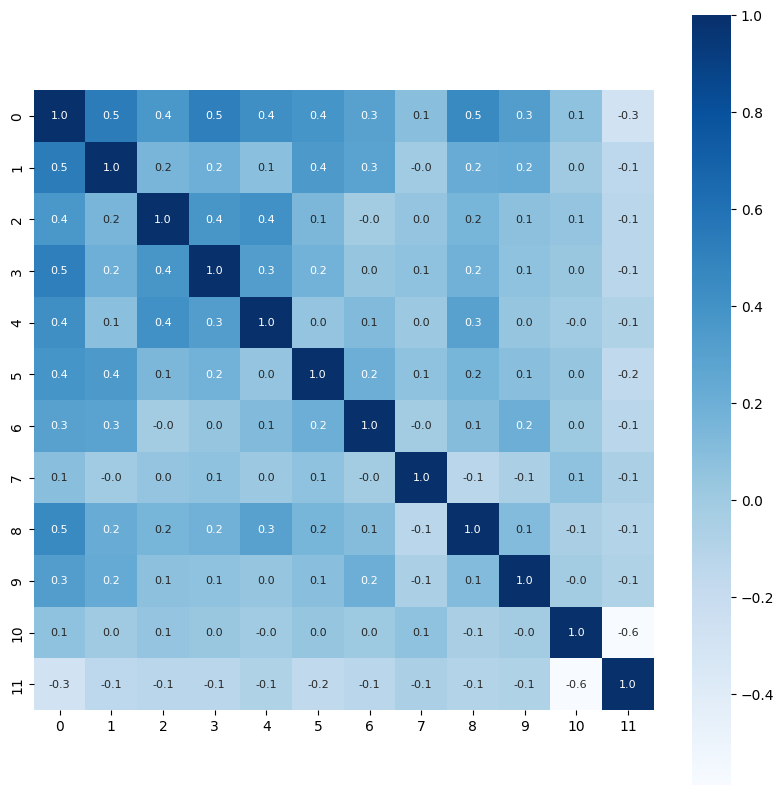

In [220]:
# constructing heat map to understanding the corelation
plt.figure(figsize=(10,10))
sns.heatmap(corelation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Spliting the data and target

In [222]:
X = house_price_dataframe.drop([0],axis=True)
Y = house_price_dataframe[0]

In [223]:
print(X)
print(Y)

           1         2         3   ...        9         10        11
0    1.046726  1.403419  1.421812  ...  1.804941 -0.844888 -0.696429
1    1.757010  1.403419  5.405809  ... -0.554035 -0.844888 -0.696429
2    2.218232  0.047278  1.421812  ...  1.804941  1.183588 -0.696429
3    1.083624  1.403419  1.421812  ...  1.804941 -0.844888 -0.696429
4    1.046726  1.403419 -0.570187  ... -0.554035 -0.844888 -0.696429
..        ...       ...       ...  ...       ...       ...       ...
540 -0.991879 -1.308863 -0.570187  ... -0.554035 -0.844888  1.435896
541 -1.268613  0.047278 -0.570187  ... -0.554035  1.183588 -0.696429
542 -0.705921 -1.308863 -0.570187  ... -0.554035 -0.844888  1.435896
543 -1.033389  0.047278 -0.570187  ... -0.554035 -0.844888 -0.696429
544 -0.599839  0.047278 -0.570187  ... -0.554035 -0.844888  1.435896

[545 rows x 11 columns]
0      4.566365
1      4.004484
2      4.004484
3      3.985755
4      3.554979
         ...   
540   -1.576868
541   -1.605149
542   -1.614327
543

Splitting the data into Training data and Test data

In [224]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [225]:
print(X.shape,X_train.shape,X_test.shape)

(545, 11) (436, 11) (109, 11)


Model Train

XGBoost Regressor

In [226]:
# Loading the Model
model =  XGBRegressor()

In [227]:
# Training the model with X_train
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

Prediction on training data

In [228]:
# accuracy on Training data
training_data_prediction = model.predict(X_train)
print(training_data_prediction)

[-0.689952   -0.2503596  -1.1317545   0.03139969 -0.35158467  1.1688343
 -1.0135232  -1.1003898   1.1506444  -0.01888658 -0.7904334  -1.0172113
  0.66631603  0.5504422   1.6009411  -0.33879805  0.28506416 -0.07829017
  1.5838038  -0.29852387 -0.35966417 -1.1520661   0.27543864 -0.20914148
 -0.4723207  -0.39038697  1.089405    2.3861732  -0.09574028 -0.8604314
 -0.5236705  -0.9005884  -1.2951812  -0.46955052 -0.36276743 -0.9919441
  0.06380738 -0.5973579  -1.5106558   1.7098676  -0.36992103  3.9866126
  2.0270762   1.4700131  -0.32308224 -0.85155    -0.3492561  -0.53282243
 -0.7282412  -1.2362231   0.5619619  -0.37968212 -0.47124428 -0.80515486
 -0.33475474  0.3136628  -0.5852813  -0.43535084 -0.58400494 -0.2965135
  1.5159553  -0.23511459  0.62226397 -0.93735063 -0.51688147  0.37934303
  0.9386232   0.54732186  0.3964284   0.39365873 -0.7941013  -0.5379244
 -1.0547256   0.08940757  0.2648823  -0.54075295  0.5982992  -0.3238693
  1.0841882   0.32801947 -0.89715135 -0.70757324  1.0228564

In [229]:
# R Square error
score_1 = metrics.r2_score(Y_train,training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train,training_data_prediction)

print("R Squared error : ",score_1)
print("Mean Absolute error : ",score_2)

R Squared error :  0.9956893810620101
Mean Absolute error :  0.040419547547840586


Visual the actual and predicted prices

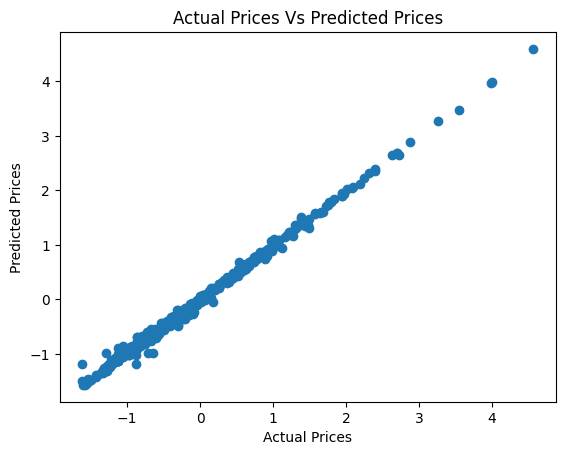

In [232]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices Vs Predicted Prices")
plt.show()

Prediction On Test Data

In [230]:
# accuracy on Test data
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[-0.34807634  0.95929736 -0.70760465 -0.37410277  0.3356366  -0.33956802
 -0.5080157  -1.0230983  -1.3516209  -0.2766435  -0.88405764 -0.9871982
 -0.35522172  0.31998074  0.32118168  0.6360461   1.134974    0.01808143
 -1.0151339   0.06960933 -0.35412014 -0.34051096  0.04665445  1.55491
 -1.3403099  -0.9358355  -0.9338181  -0.43829724 -0.29347736 -0.3849806
 -0.14062057 -0.9992789  -0.24467315  0.15531704 -0.63570243  1.3030556
 -0.8549648   1.6845828   1.0256593  -1.3396369   0.7358681  -0.9041325
 -0.8220478   0.13220663 -0.9797328  -0.11987534 -1.6195614  -0.98690665
 -0.42292517 -0.40758395  1.6447346   0.58234876 -1.4752787  -0.9338181
 -0.51397926  0.3751406  -0.4326238  -0.19359325 -1.4672499   1.7221062
 -0.7247178  -0.7524687  -0.27379134  0.712443    1.8830811   0.5541928
 -0.46955052  0.04761813 -0.76557463  1.517881    0.28578615 -0.06188096
  0.6486917   0.4259892  -0.0090726   0.530053    0.5446963   1.1528813
  0.8225132   0.46372122  0.5414041  -0.23711766 -0.26840195 -

In [231]:
# R Square error
score_1 = metrics.r2_score(Y_test,test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test,test_data_prediction)

print("R Squared error : ",score_1)
print("Mean Absolute error : ",score_2)

R Squared error :  0.38705291066079495
Mean Absolute error :  0.5358007117516829
